In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_pdf import PdfPages
import random
import pingouin
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()
            
    return df

C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
data_dict = {"$CPI$":"CPIAUCNS",
             "MB": "BOGMBASE",
             "UST10Y": "DGS10",
             "NGDP":"GDP",
             "Currency":"CURRCIR",
             "FRAssets":"WALCL",
             "EFFR": "DFF",
            "$\\frac{Debt}{GDP}$":"FYGFGDQ188S"}

freq = "Q"
start = datetime.datetime(1950, 1, 1)
# end = datetime.datetime(1985, 12, 31)
end =datetime.datetime.today()

data = gather_data(data_dict, start, 
          end = end, freq = freq)
# df["Nominal GDP"] = df["Nominal GDP"].mul(1000)
# df["Real GDP"] = df["Real GDP"].mul(1000)

In [3]:
freq = 4 * 1
keys = data.keys()
annual_rate = data.copy()
quarterly_rate = data.copy()
for key in keys:
#     if "PPI" in key or "CPI" in key or "M2" in key:
    annual_rate[key] = data[key].pct_change(freq ) * 100
    quarterly_rate[key] = ((data[key].pct_change(1)).add(1)).pow(freq ).sub(1).mul(100)

for key in keys:
    if "Rate" in key or "UST" in key:
        annual_rate[key] = data[key]
        quarterly_rate[key] = data[key]
        
diff_annual_rate = annual_rate.diff(freq)

In [4]:
annual_rate

,$CPI$,MB,UST10Y,NGDP,Currency,FRAssets,EFFR,$\frac{Debt}{GDP}$
DATE,,,,,,,,
1950-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-03-31,8.923513,NaN,NaN,19.646189,0.429427,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-03-31,7.966707,10.550509,1.951129,10.874995,6.563495,18.227333,57.947977,-2.036173
2022-06-30,8.635613,-6.227707,2.932581,9.552429,4.898536,13.095531,1023.671498,-2.267800
2022-09-30,8.329476,-12.295930,3.101094,9.229224,4.048787,6.575926,2325.483092,-0.181956


,$CPI$,MB,UST10Y,NGDP,Currency,FRAssets,EFFR,$\frac{Debt}{GDP}$
$CPI$,1.000000,-0.314048,0.373856,0.210300,-0.219430,-0.587403,0.033725,-0.499499
MB,-0.314048,1.000000,-0.144847,-0.360256,0.613403,0.924562,-0.268731,0.613261
UST10Y,0.373856,-0.144847,1.000000,0.224776,-0.082298,-0.319832,0.221521,-0.271705
NGDP,0.210300,-0.360256,0.224776,1.000000,-0.059797,-0.609248,-0.038306,-0.717385
Currency,-0.219430,0.613403,-0.082298,-0.059797,1.000000,0.739001,-0.186672,0.463535
FRAssets,-0.587403,0.924562,-0.319832,-0.609248,0.739001,1.000000,-0.138794,0.800798
EFFR,0.033725,-0.268731,0.221521,-0.038306,-0.186672,-0.138794,1.000000,-0.032404
$\frac{Debt}{GDP}$,-0.499499,0.613261,-0.271705,-0.717385,0.463535,0.800798,-0.032404,1.000000


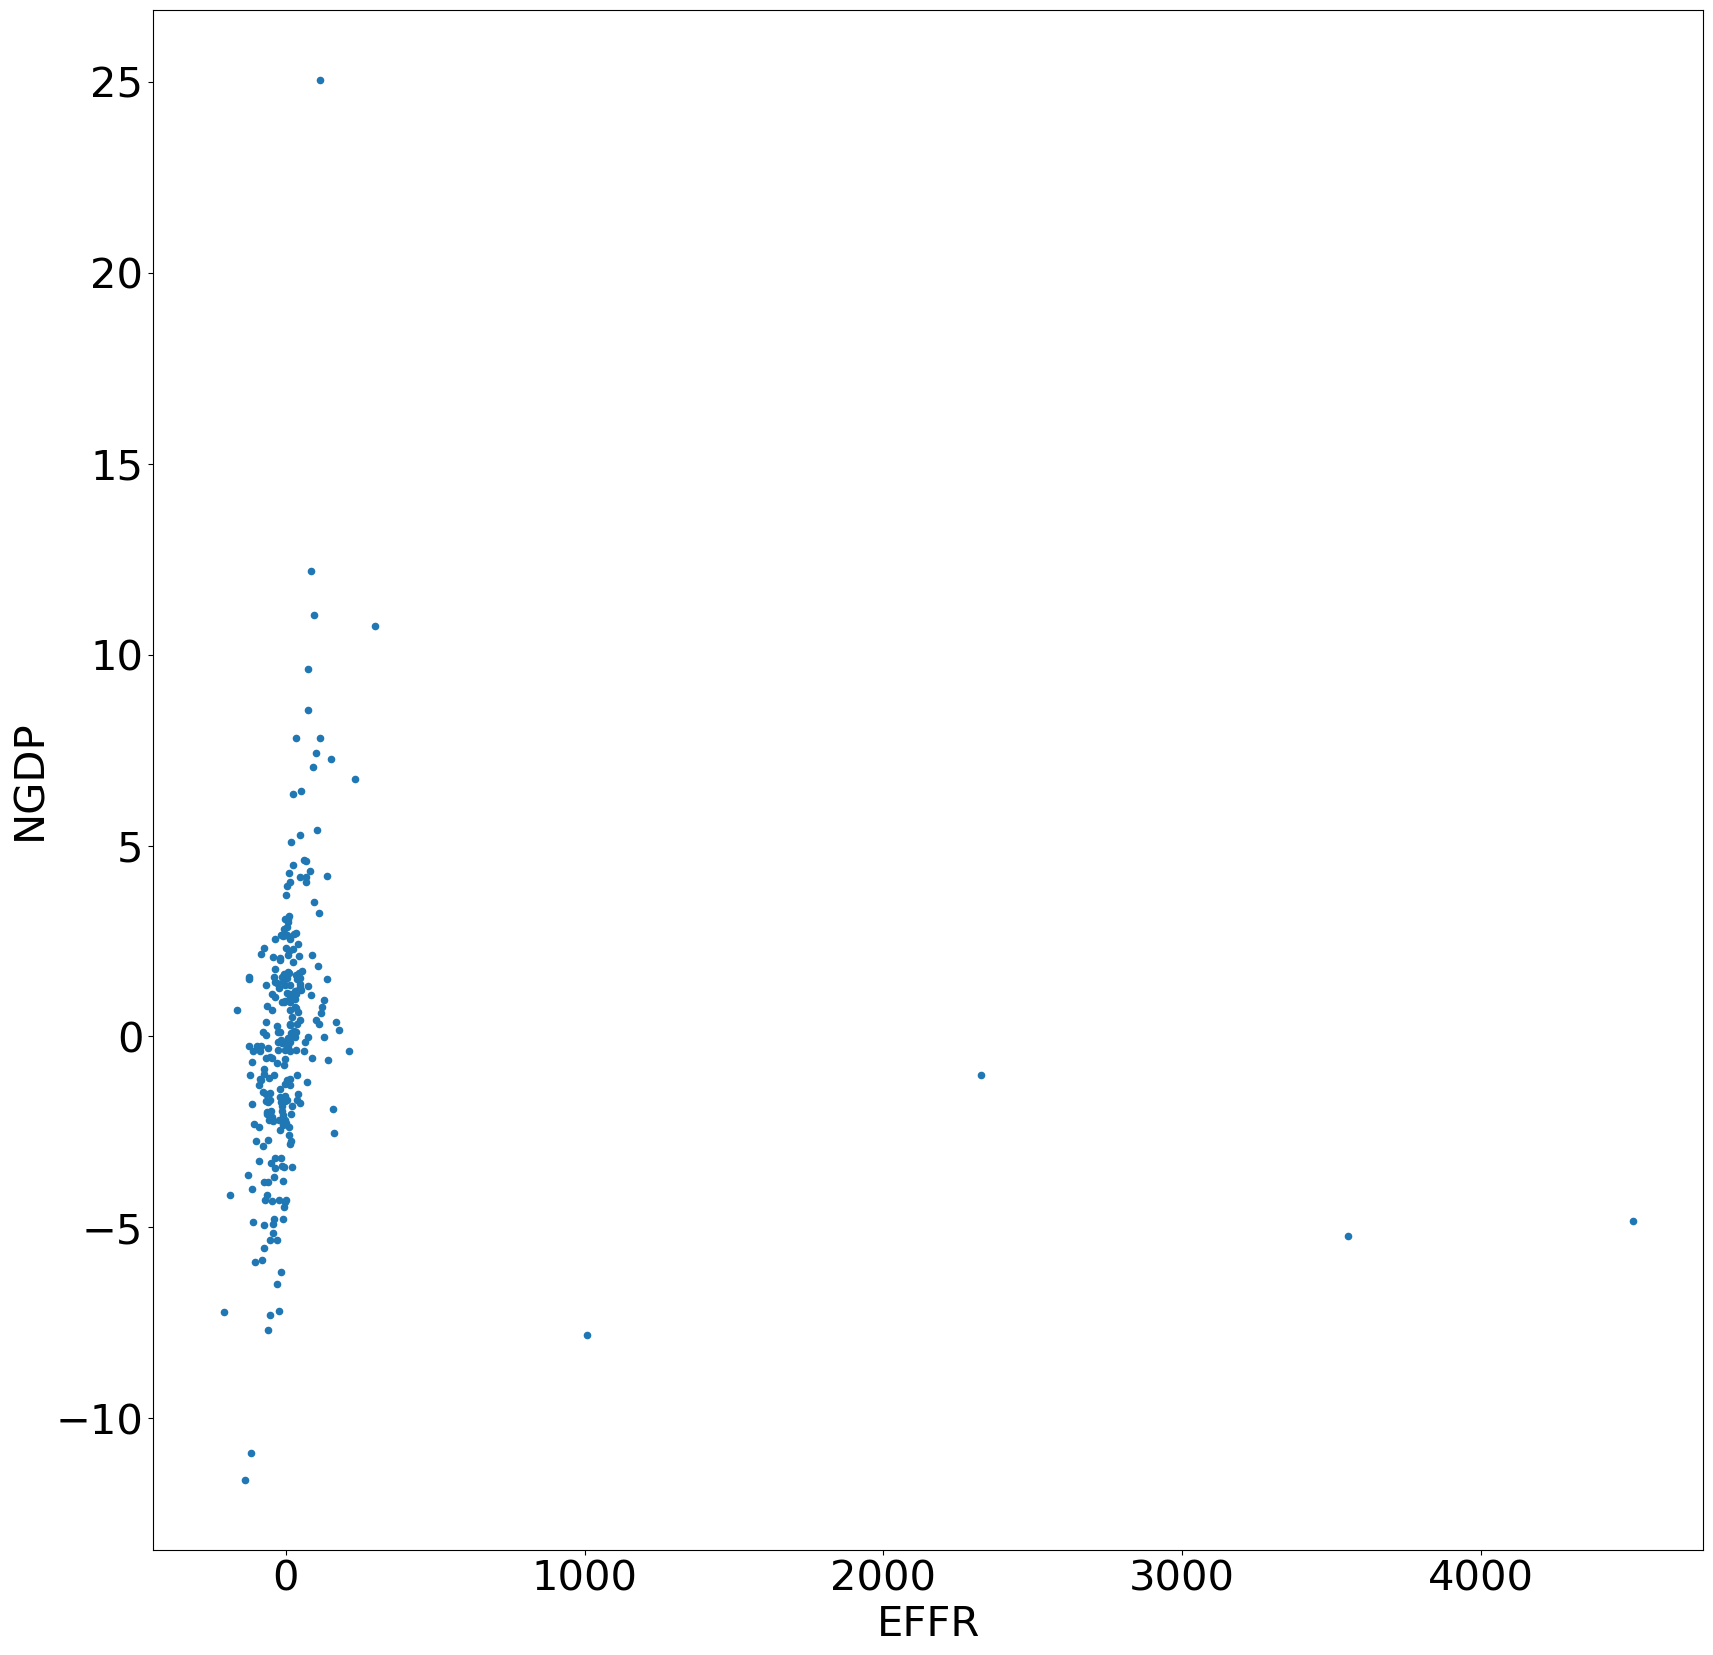

In [5]:
plt.rcParams.update({"font.size":30})
fig, ax = plt.subplots(figsize = (20,20))
annual_rate.diff(freq).plot.scatter(y = "NGDP", x = "EFFR", ax = ax)
annual_rate.diff(freq).corr()

In [6]:
def build_smooth_multiple_regression_estimator(reg, orig_df):
    def find_between_from_list(lst, start, end):
        for i in range(len(lst)):
            s = lst[i]
            if start in s and end in s:
                lst[i] = (s.split(start))[1].split(end)[0]
        return lst    
    results = reg.fit()
    df = reg.data.frame
    orig_names =  find_between_from_list(list(reg.data.orig_endog.keys()) + list(reg.data.orig_exog.keys()), "(", ")")
    y_var, X_vars = orig_names[0], orig_names[1:]
    X_vars = [x for x in X_vars if x != "Intercept" and x in df.keys()]
    for x_name in X_vars:
        x_min, x_max = df[x_name].describe()[["min","max"]]
        X = pd.DataFrame({x_name: np.linspace(x_min, x_max, num = 1000)})
        keys = [x for x in X_vars if x != x_name]
        X[keys] = df[keys].mean()
        lpr_PICI = results.get_prediction(X).summary_frame(alpha = 0.05)
        lpr_PICI.index = X[x_name]
        lpr_CI = lpr_PICI[["mean", "mean_ci_lower", "mean_ci_upper"]]
        fig, ax = plt.subplots(figsize = (20,10))
        for key in lpr_CI:
            ls, alpha = ("--", .5) if "ci" in key else ("-", 1)
            lpr_CI[[key]].plot(ls = ls, 
                               linewidth = 3, 
                               alpha = alpha, color = "C0", ax = ax)
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_var)
        scatter_df = df.copy()
        orig_yname =  list(reg.data.orig_endog.keys())[0]
        orig_y = reg.data.orig_endog[orig_yname]
        scatter_df[y_var] = orig_y
        scatter_df.groupby(x_name).mean()[y_var].reset_index().plot.scatter(x = x_name, y = y_var, 
                                                                                ax = ax, color = "k", alpha = .75)

In [7]:
annual_rate

,$CPI$,MB,UST10Y,NGDP,Currency,FRAssets,EFFR,$\frac{Debt}{GDP}$
DATE,,,,,,,,
1950-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-03-31,8.923513,NaN,NaN,19.646189,0.429427,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-03-31,7.966707,10.550509,1.951129,10.874995,6.563495,18.227333,57.947977,-2.036173
2022-06-30,8.635613,-6.227707,2.932581,9.552429,4.898536,13.095531,1023.671498,-2.267800
2022-09-30,8.329476,-12.295930,3.101094,9.229224,4.048787,6.575926,2325.483092,-0.181956


                            OLS Regression Results                            
Dep. Variable:                   NGDP   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     37.03
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           6.52e-28
Time:                        16:39:10   Log-Likelihood:                -575.05
No. Observations:                 241   AIC:                             1162.
Df Residuals:                     235   BIC:                             1183.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0941      0.173      0.544      0.5

,NGDP,EFFR,UST10Y,Currency,MB,NGDPLag1
NGDP,1.000000,-0.028385,0.265931,0.122979,-0.345025,-0.517637
EFFR,-0.028385,1.000000,0.172116,0.033056,-0.217729,0.221740
UST10Y,0.265931,0.172116,1.000000,-0.007428,0.010992,0.203739
Currency,0.122979,0.033056,-0.007428,1.000000,0.625991,-0.079773
MB,-0.345025,-0.217729,0.010992,0.625991,1.000000,-0.052526
NGDPLag1,-0.517637,0.221740,0.203739,-0.079773,-0.052526,1.000000


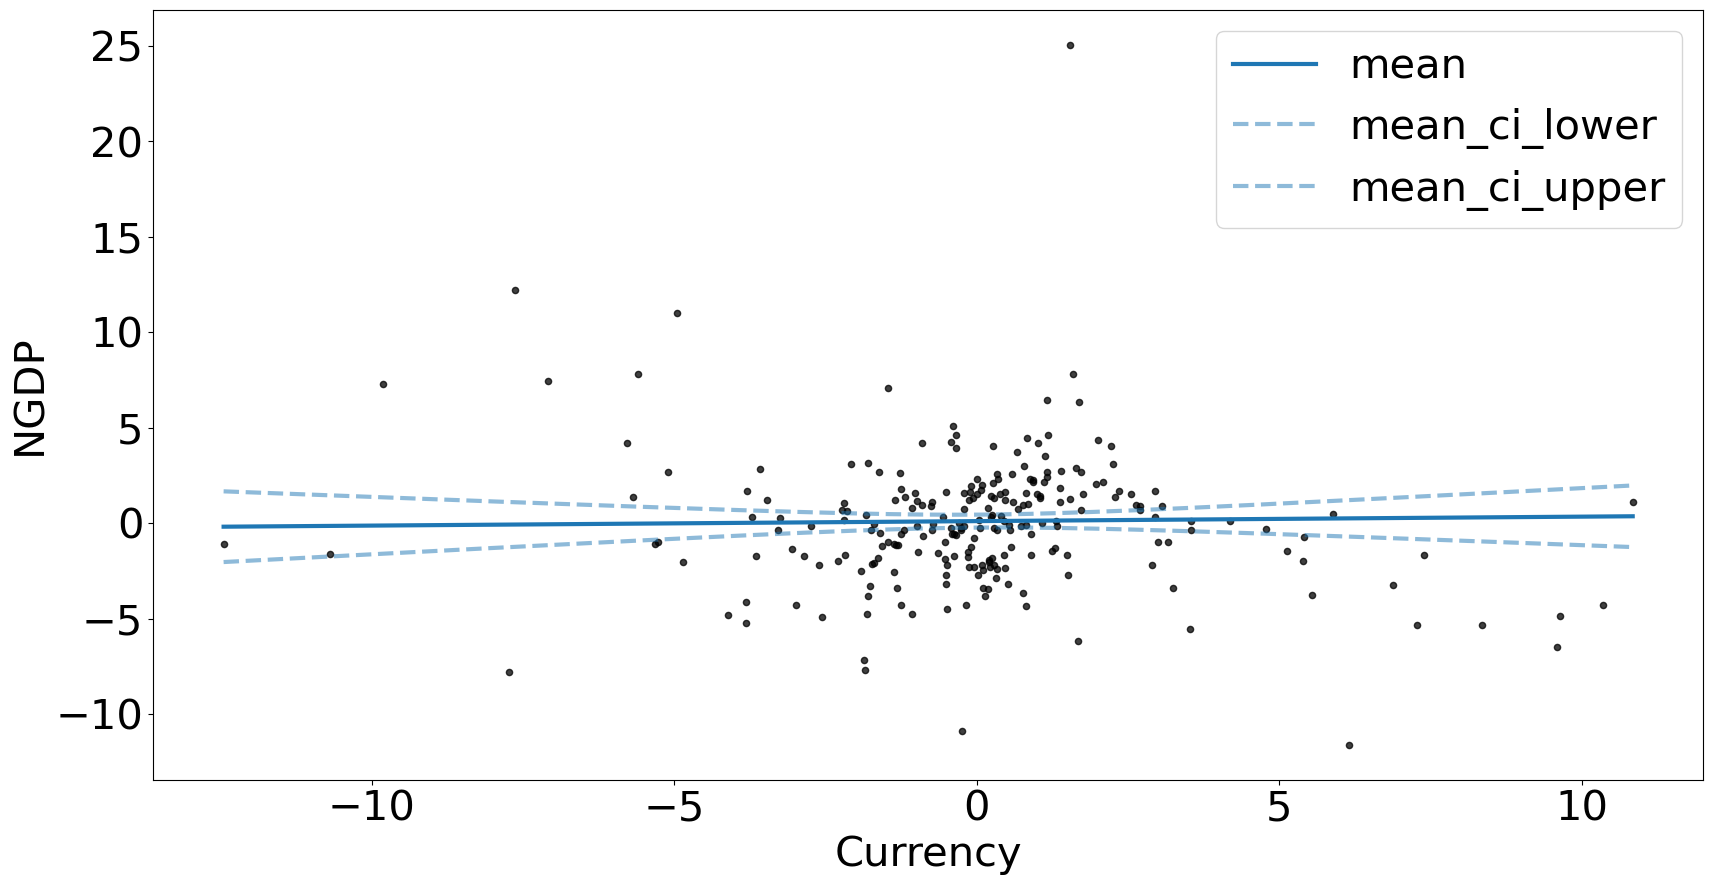

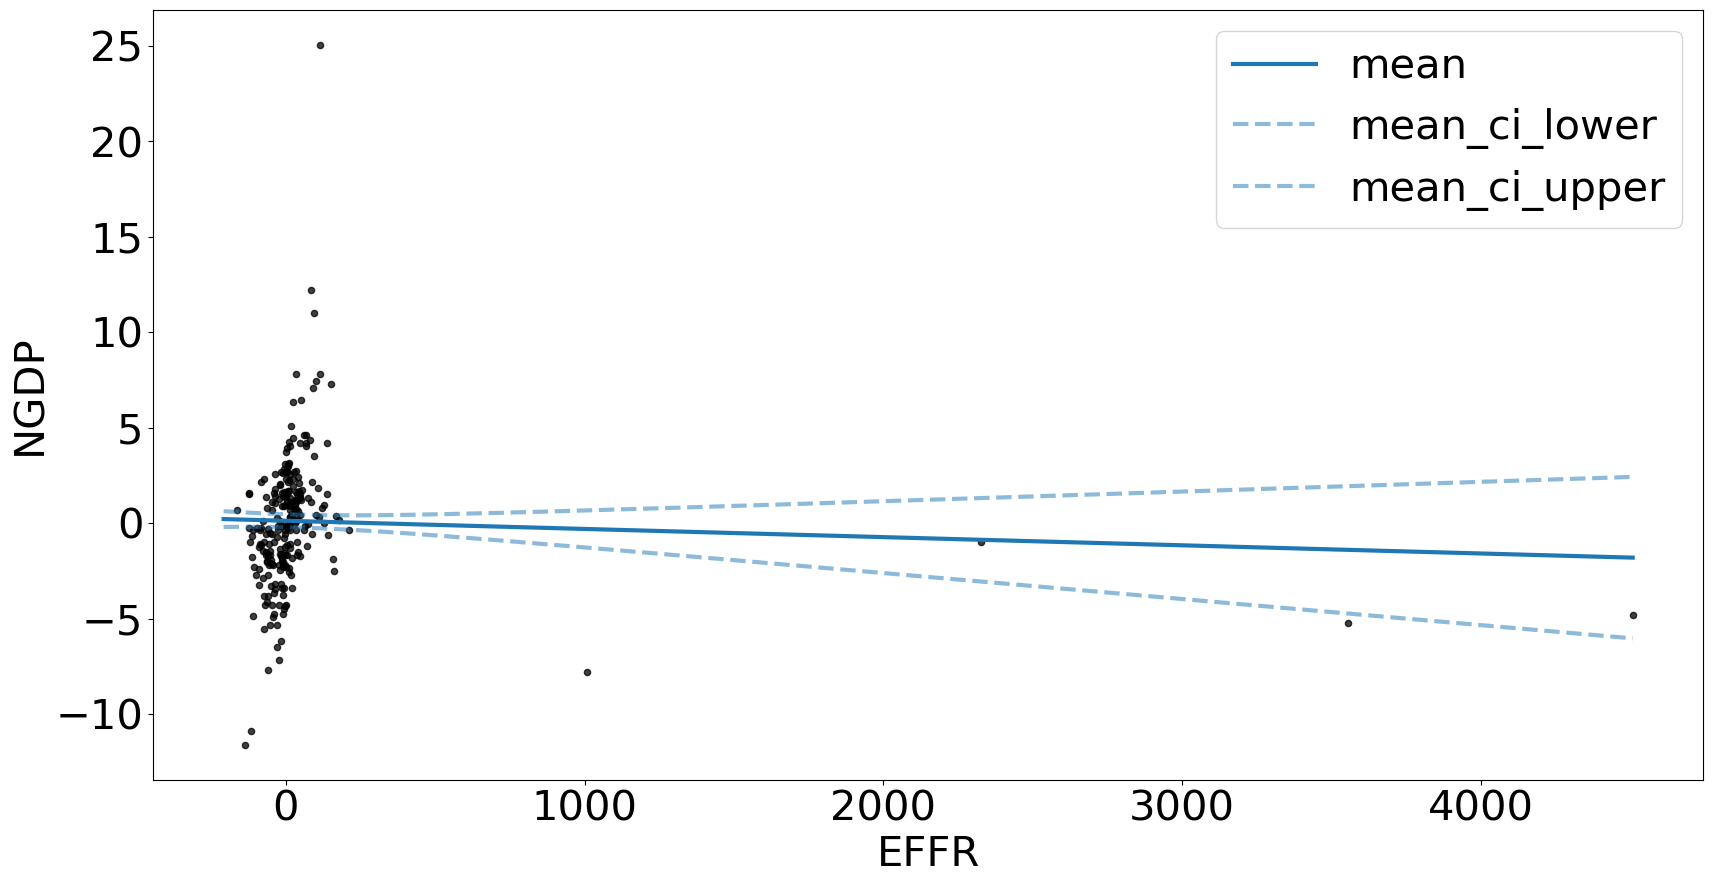

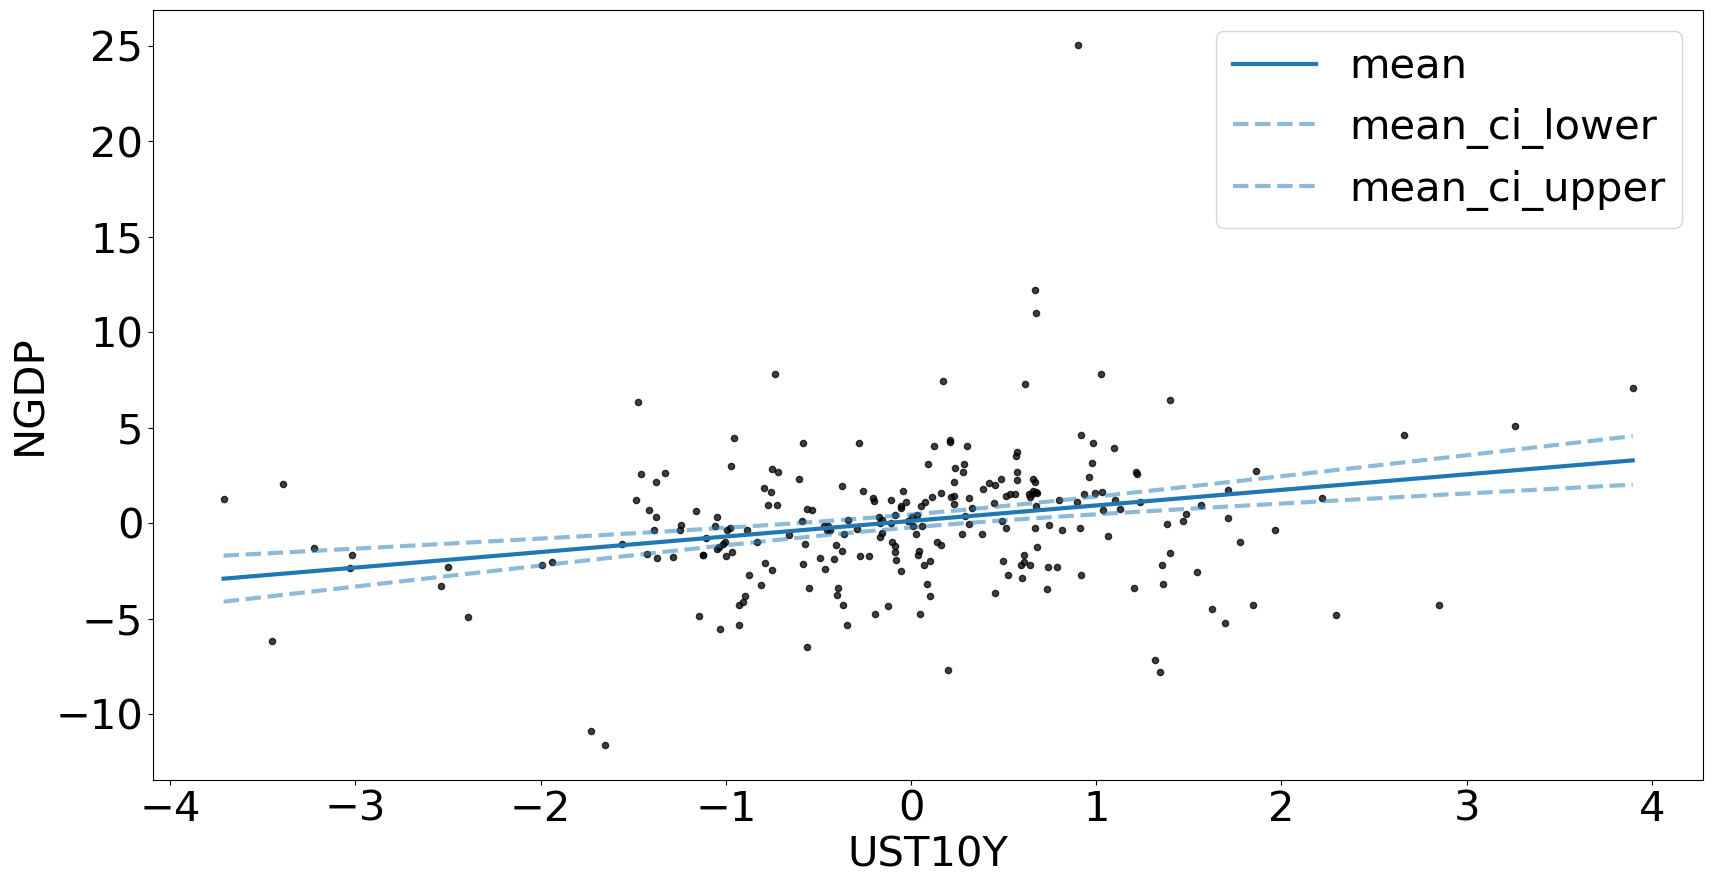

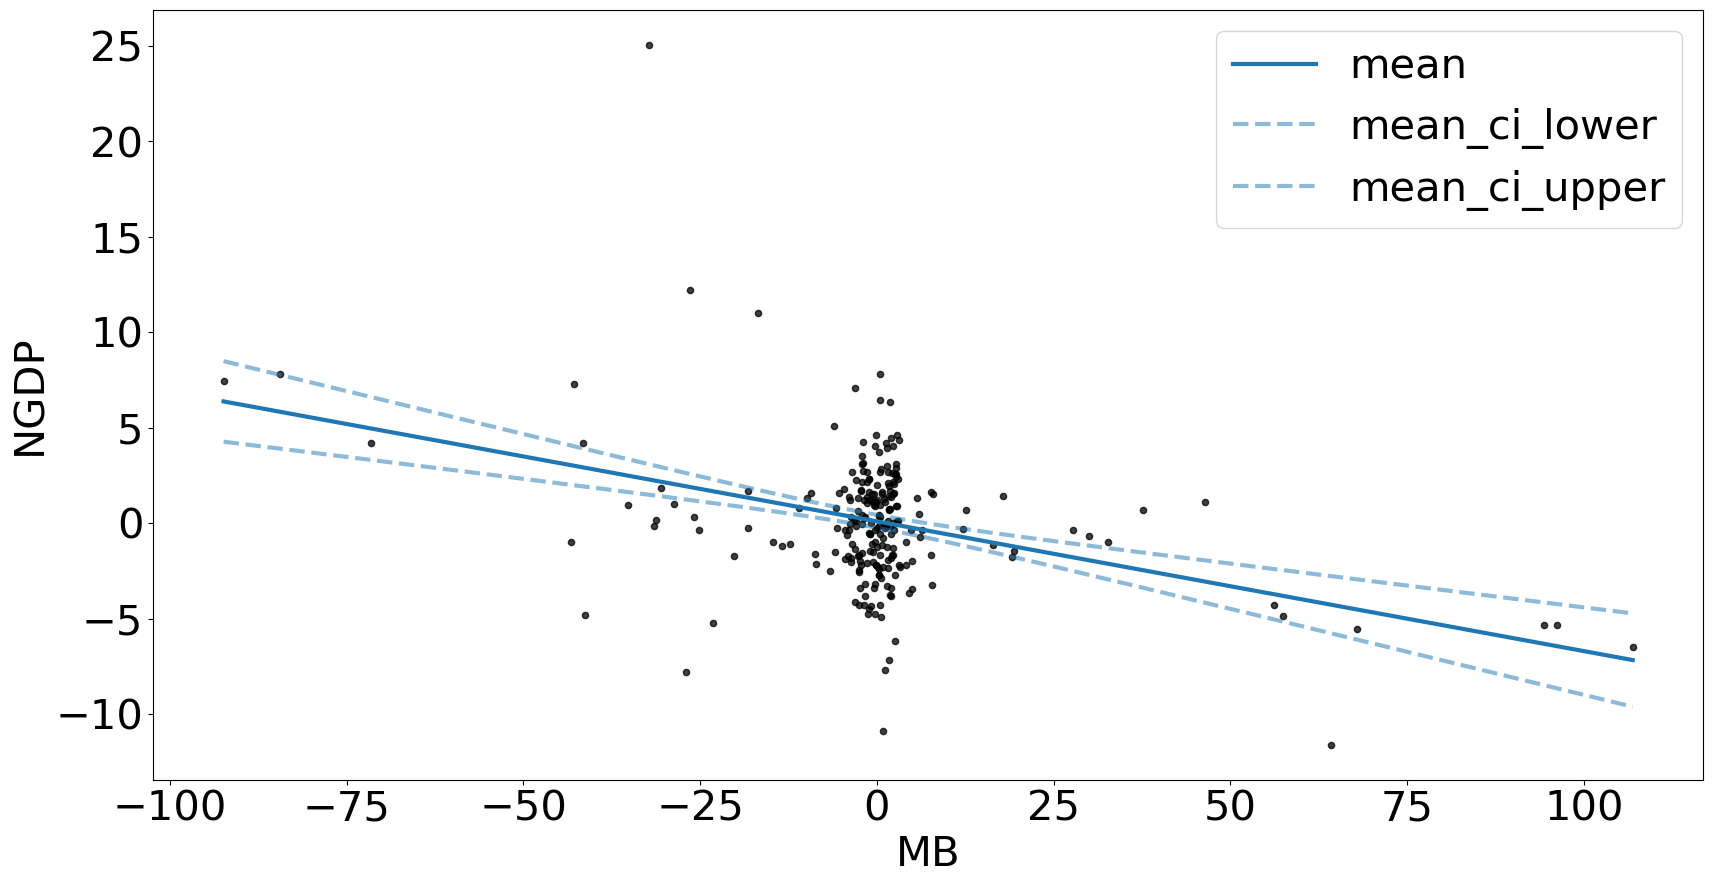

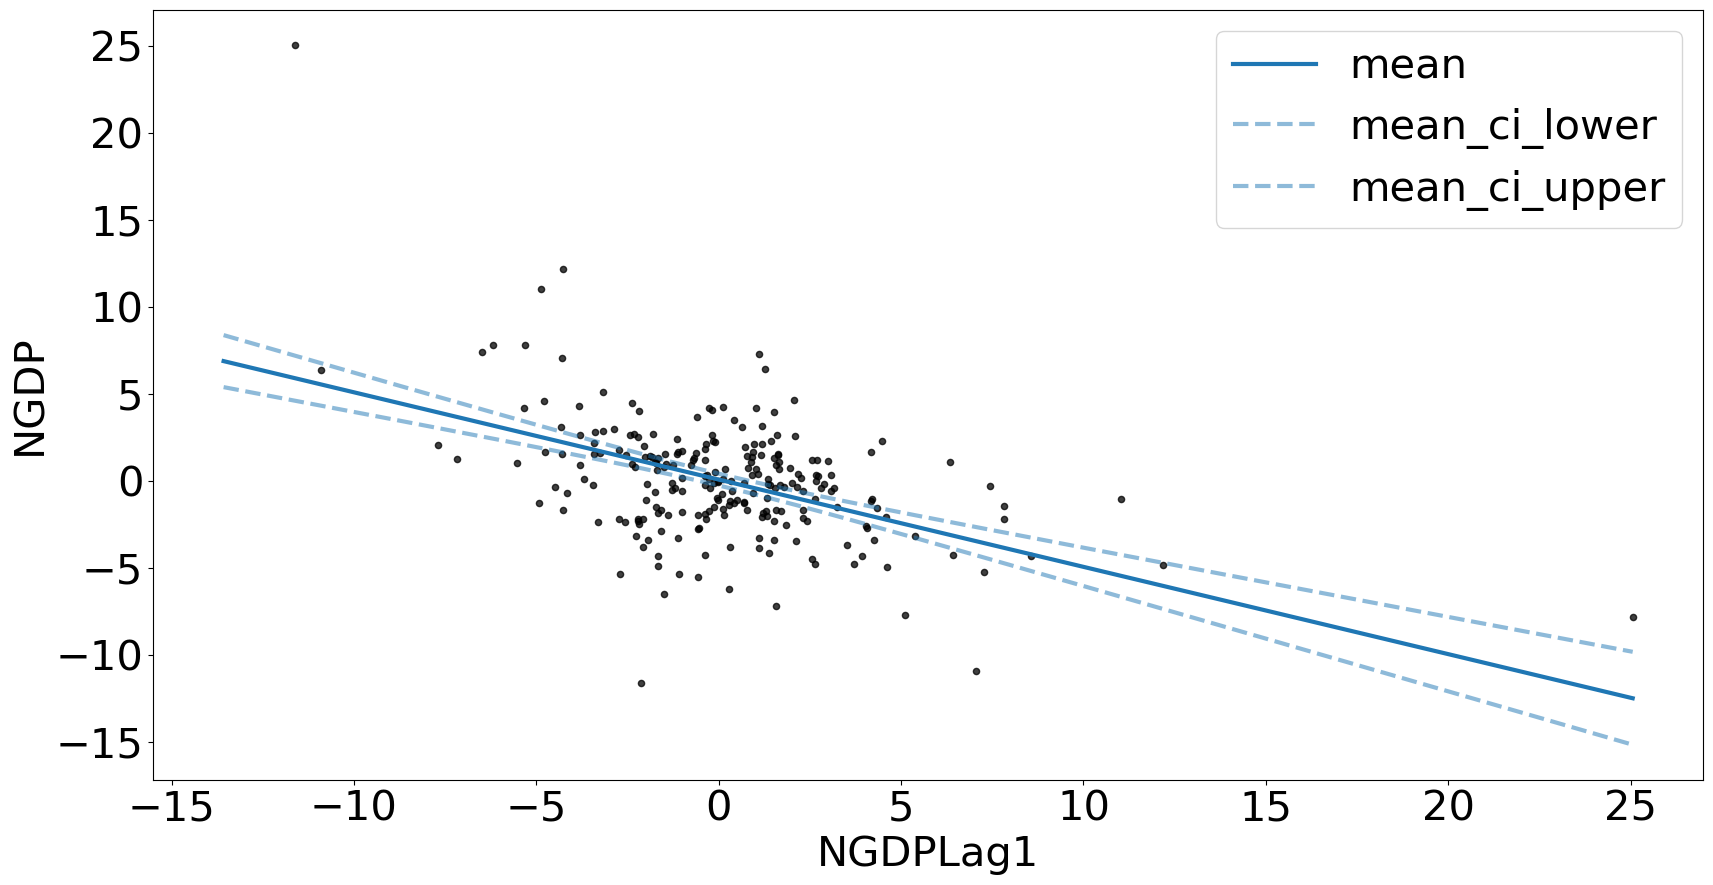

In [8]:
# fig, ax = plt.subplots(figsize = (20,20))
lags = 1
plot_vars = ["NGDP",  "EFFR", "UST10Y", "Currency", "MB"]
# annual_rate["FRAssets"].fillna(0, inplace = True)
plot_df = annual_rate.diff(freq)[plot_vars]#.loc[:"2003"]
formula = 'NGDP ~  Currency + EFFR + UST10Y + MB'
for key in plot_df:
    for i in range(1, lags + 1):
        plot_df[key + "Lag" + str(i)] = plot_df[key].shift(freq * i)
        formula = formula + " + NGDPLag" + str(i) 

# plot_df.plot.scatter(y = "NGDP", x = "EFFR", ax = ax)
# y = plot_df[[plot_vars[0]]]
# X = plot_df[plot_vars[1:]]
# X["Constant"] = 1
# reg = sm.OLS(y, X)
reg = smf.ols(
    formula=formula,
    data = plot_df)
results = reg.fit()
print(results.summary())
build_smooth_multiple_regression_estimator(reg, plot_df)
plot_df[plot_vars + ["NGDPLag" + str(i) for i in range(1, lags + 1)]].pcorr()



                            OLS Regression Results                            
Dep. Variable:                   NGDP   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     37.76
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           2.35e-25
Time:                        16:39:11   Log-Likelihood:                -341.07
No. Observations:                 164   AIC:                             694.1
Df Residuals:                     158   BIC:                             712.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0049      0.154     -0.032      0.9

,NGDP,EFFR,UST10Y,Currency,MB,NGDPLag1
NGDP,1.000000,0.519102,0.179720,-0.047028,0.048010,-0.506556
EFFR,0.519102,1.000000,0.047164,0.139157,-0.055520,0.153735
UST10Y,0.179720,0.047164,1.000000,0.332796,-0.379164,0.230863
Currency,-0.047028,0.139157,0.332796,1.000000,0.779134,-0.173742
MB,0.048010,-0.055520,-0.379164,0.779134,1.000000,0.134327
NGDPLag1,-0.506556,0.153735,0.230863,-0.173742,0.134327,1.000000


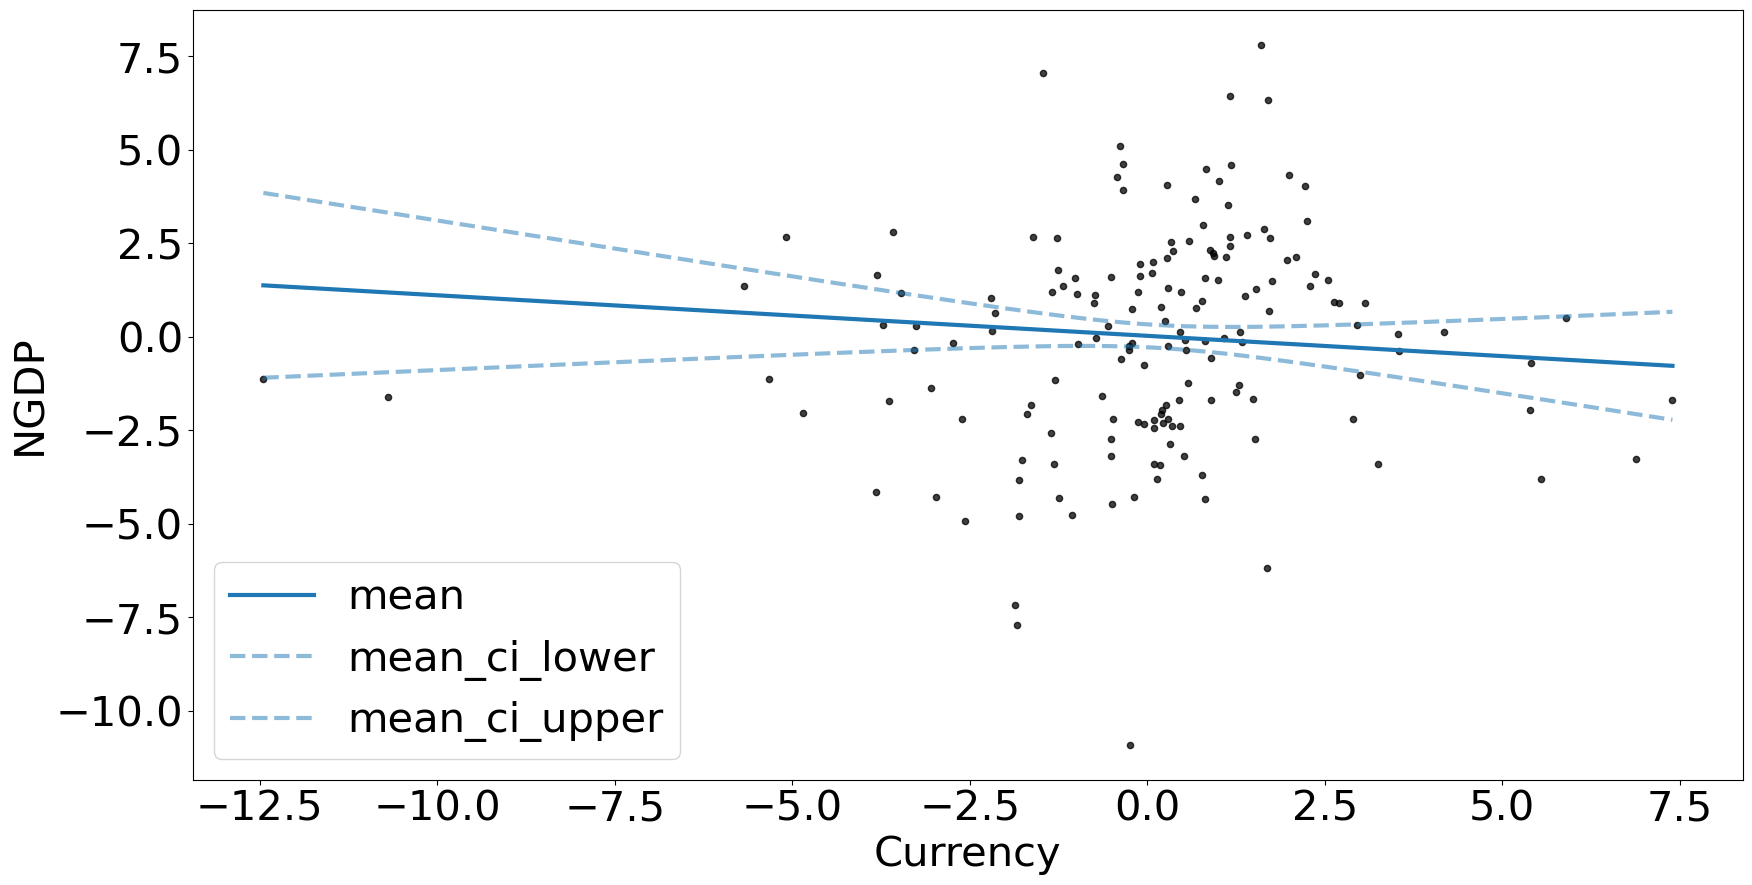

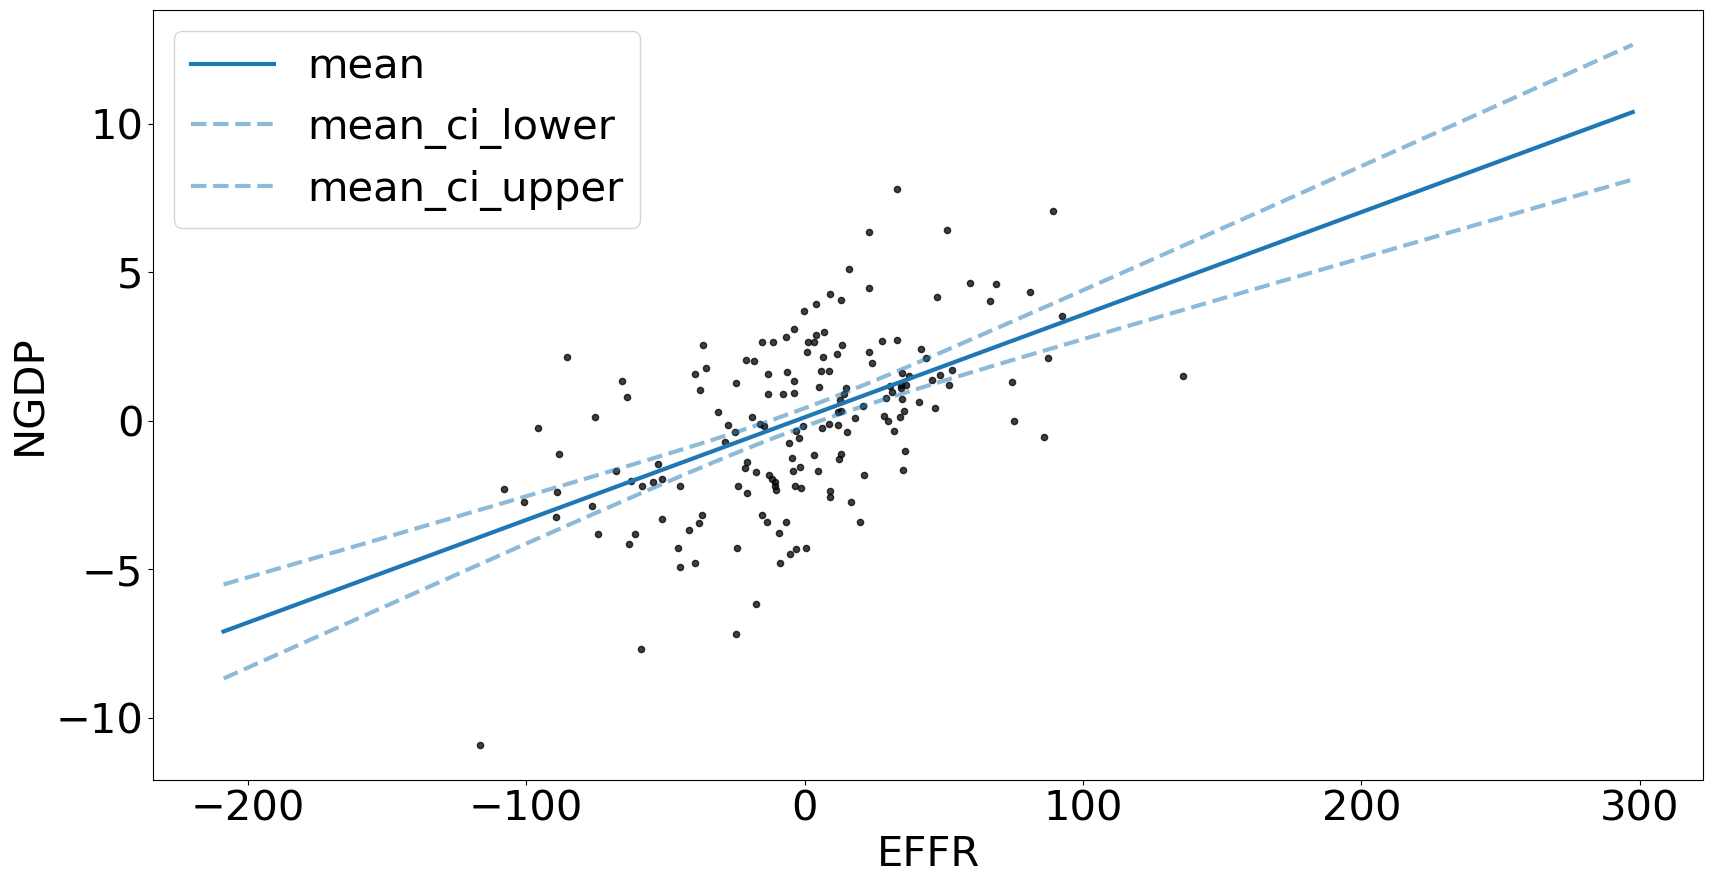

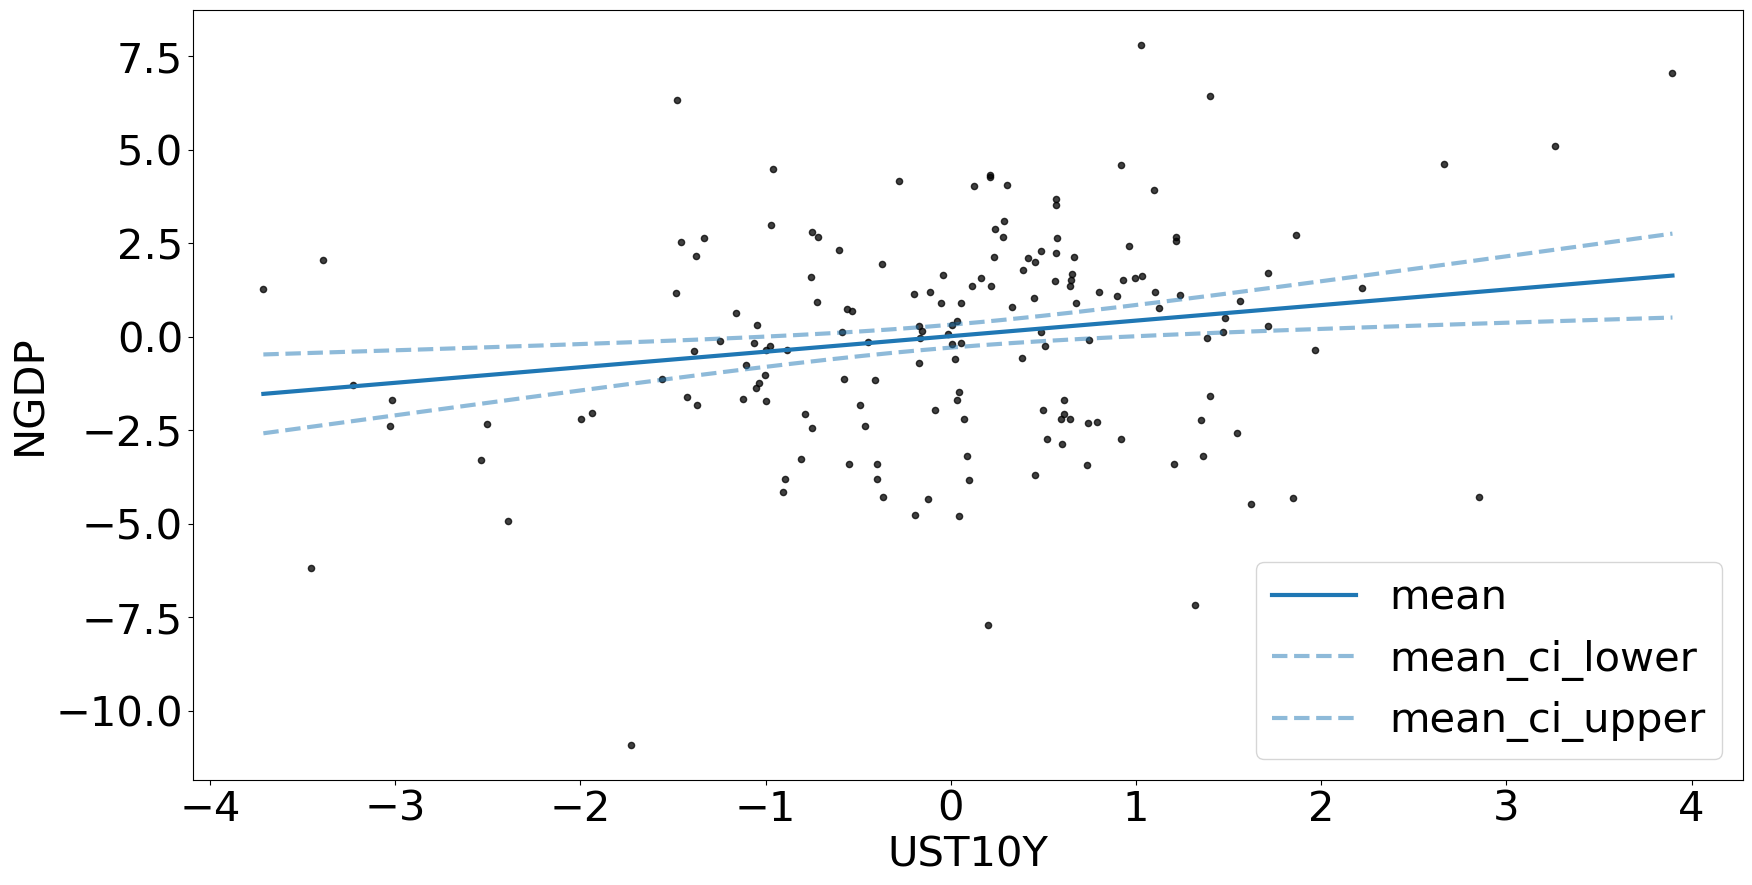

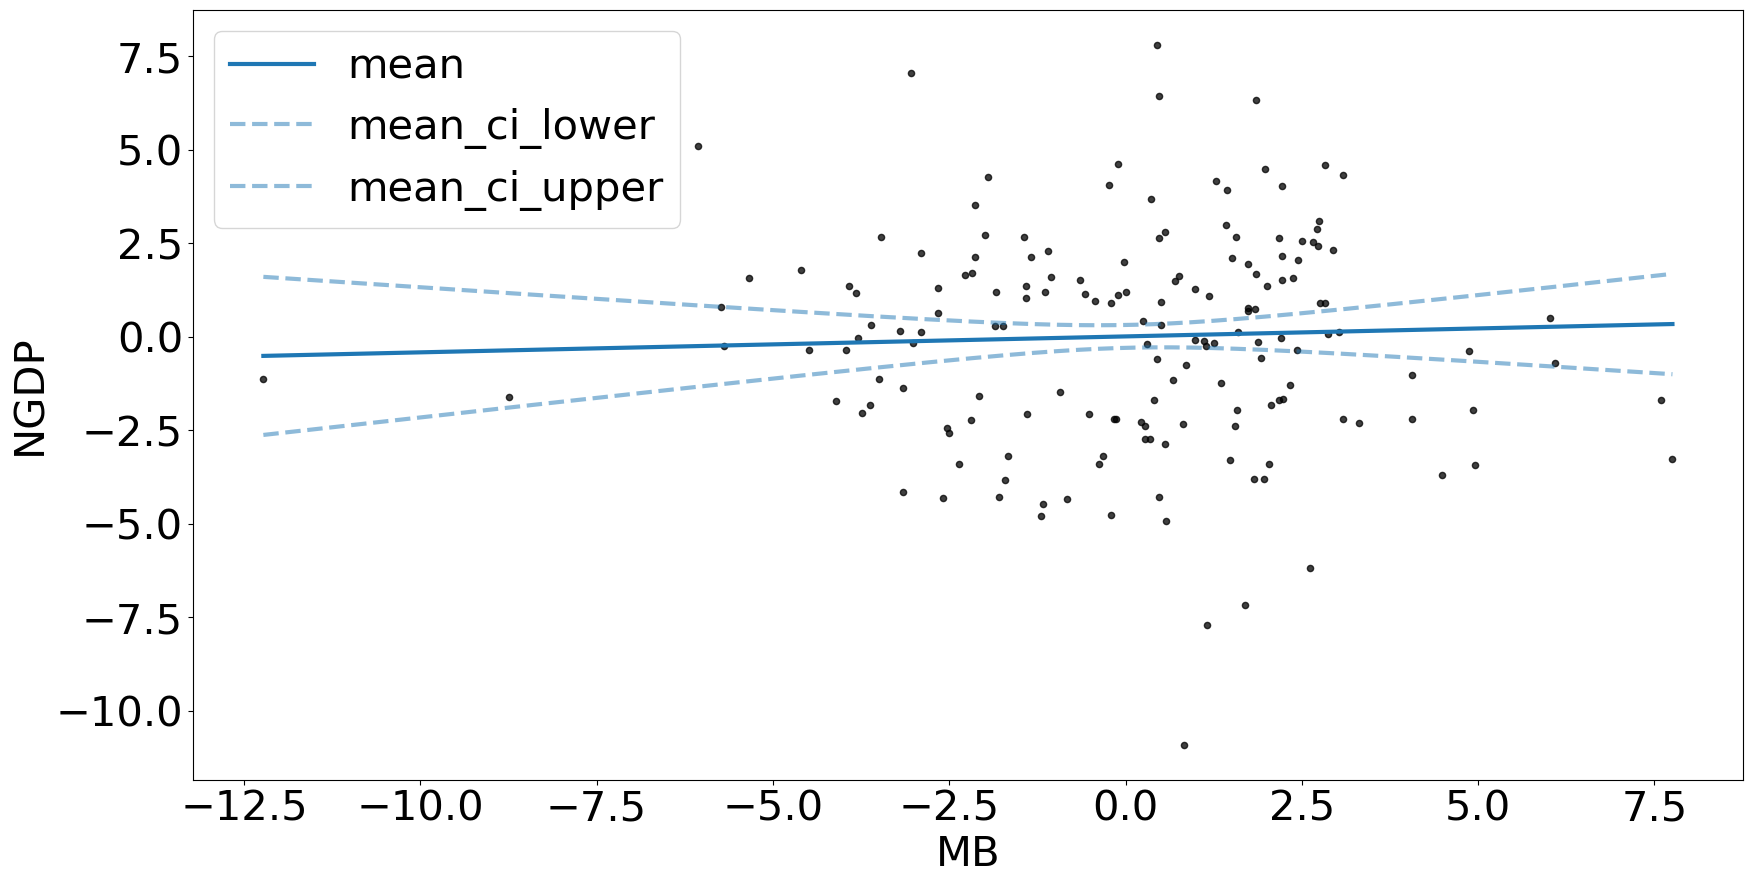

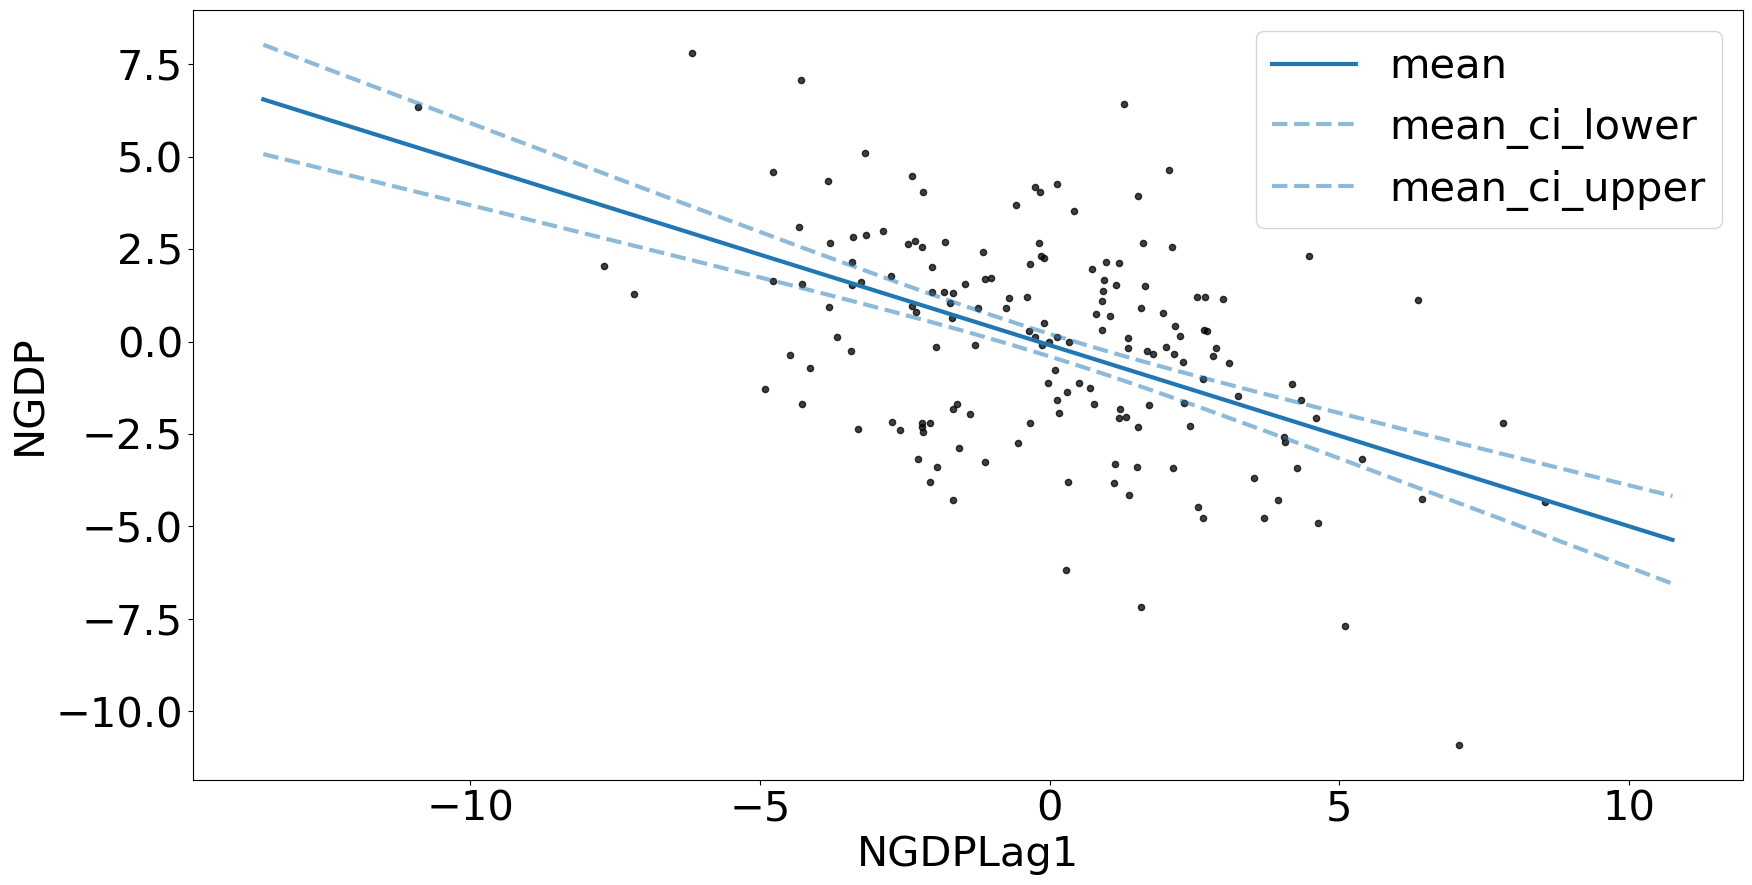

In [9]:
# fig, ax = plt.subplots(figsize = (20,20))
plot_vars = ["NGDP",  "EFFR", "UST10Y", "Currency", "MB"]
# annual_rate["FRAssets"].fillna(0, inplace = True)
plot_df = annual_rate.diff(freq)[plot_vars].loc[:"2003"]
formula = 'NGDP ~  Currency + EFFR + UST10Y + MB'
for key in plot_df:
    for i in range(1, lags + 1):
        plot_df[key + "Lag" + str(i)] = plot_df[key].shift(freq * i)
        formula = formula + " + NGDPLag" + str(i) 
# plot_df.plot.scatter(y = "NGDP", x = "EFFR", ax = ax)
# y = plot_df[[plot_vars[0]]]
# X = plot_df[plot_vars[1:]]
# X["Constant"] = 1
# reg = sm.OLS(y, X)
reg = smf.ols(
    formula=formula,
    data = plot_df)
results = reg.fit()
print(results.summary())
build_smooth_multiple_regression_estimator(reg, plot_df)
plot_df[plot_vars + ["NGDPLag" + str(i) for i in range(1, lags + 1)]].pcorr()


                            OLS Regression Results                            
Dep. Variable:                   NGDP   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     17.49
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           8.50e-12
Time:                        16:39:12   Log-Likelihood:                -174.74
No. Observations:                  70   AIC:                             363.5
Df Residuals:                      63   BIC:                             379.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5095      0.386      1.319      0.1

,NGDP,EFFR,UST10Y,Currency,MB,FRAssets,NGDPLag1
NGDP,1.000000,-0.223793,0.423252,0.119449,-0.207110,-0.092945,-0.526446
EFFR,-0.223793,1.000000,0.486673,0.117133,-0.315168,0.175427,0.184738
UST10Y,0.423252,0.486673,1.000000,-0.312593,0.329162,-0.185559,0.296750
Currency,0.119449,0.117133,-0.312593,1.000000,0.283514,0.147112,-0.095782
MB,-0.207110,-0.315168,0.329162,0.283514,1.000000,0.813699,-0.292671
FRAssets,-0.092945,0.175427,-0.185559,0.147112,0.813699,1.000000,0.268757
NGDPLag1,-0.526446,0.184738,0.296750,-0.095782,-0.292671,0.268757,1.000000


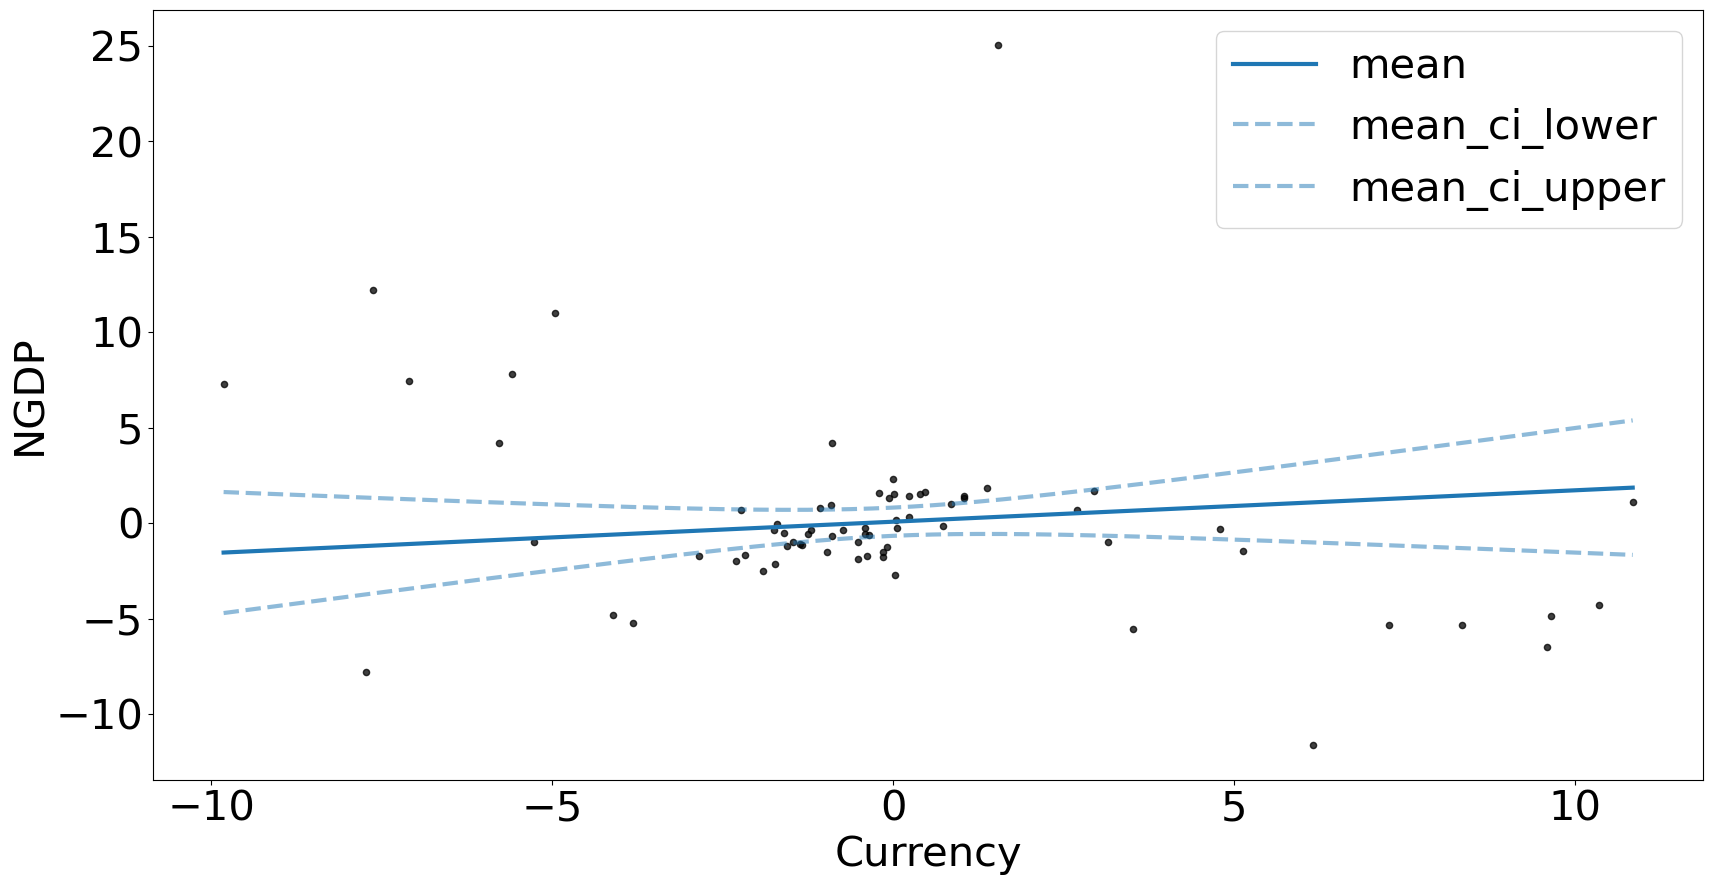

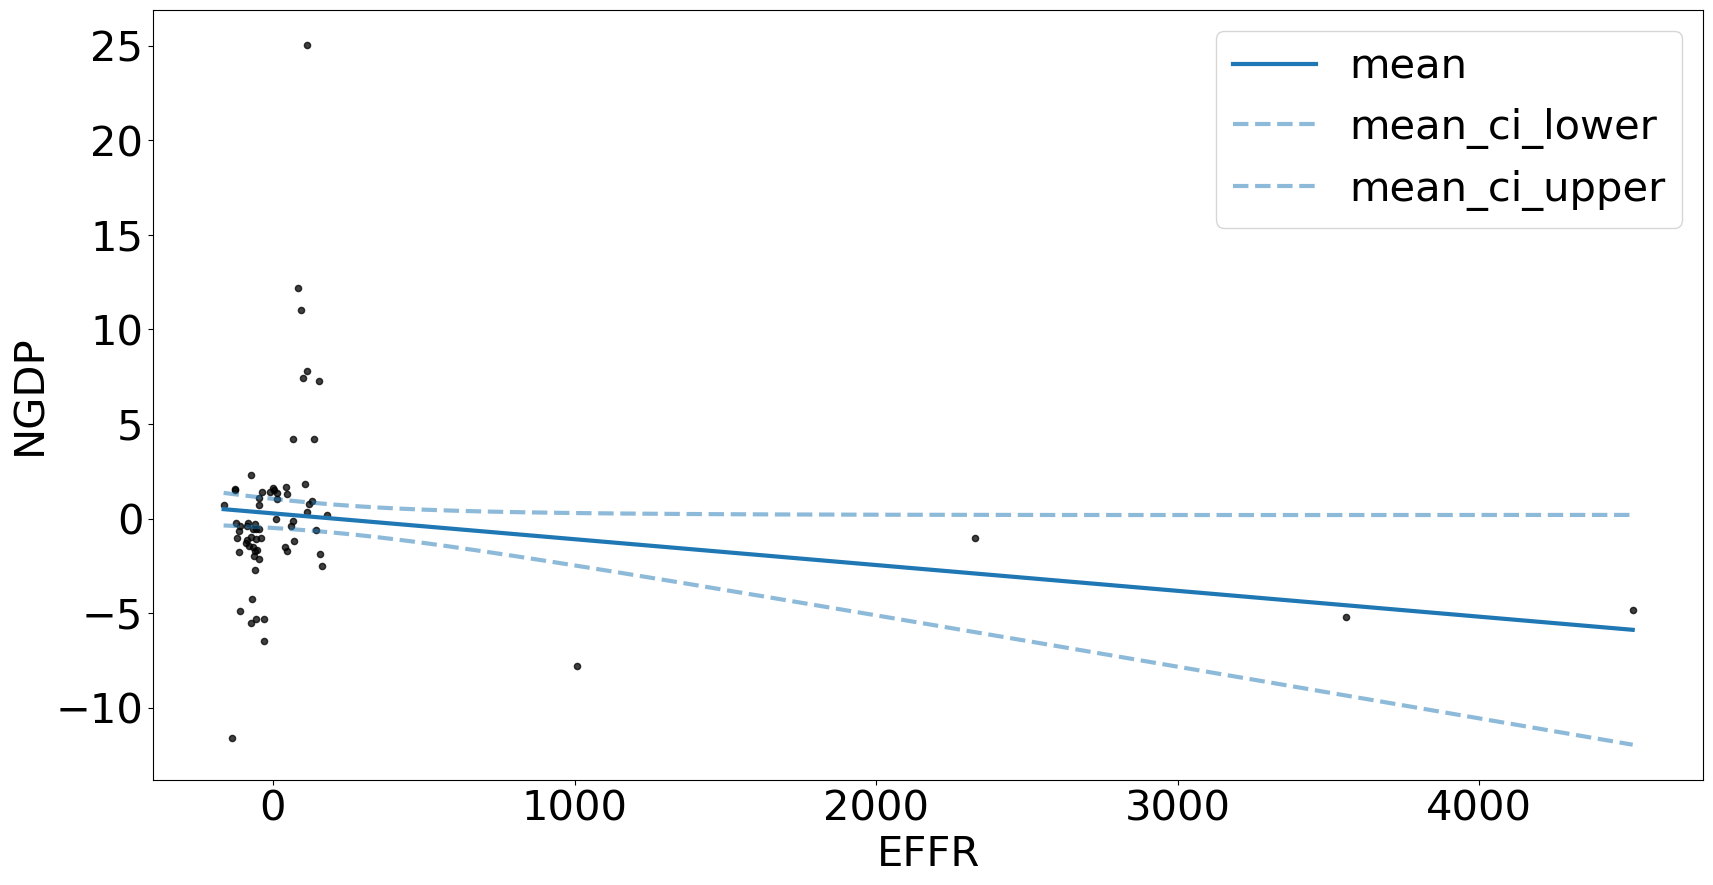

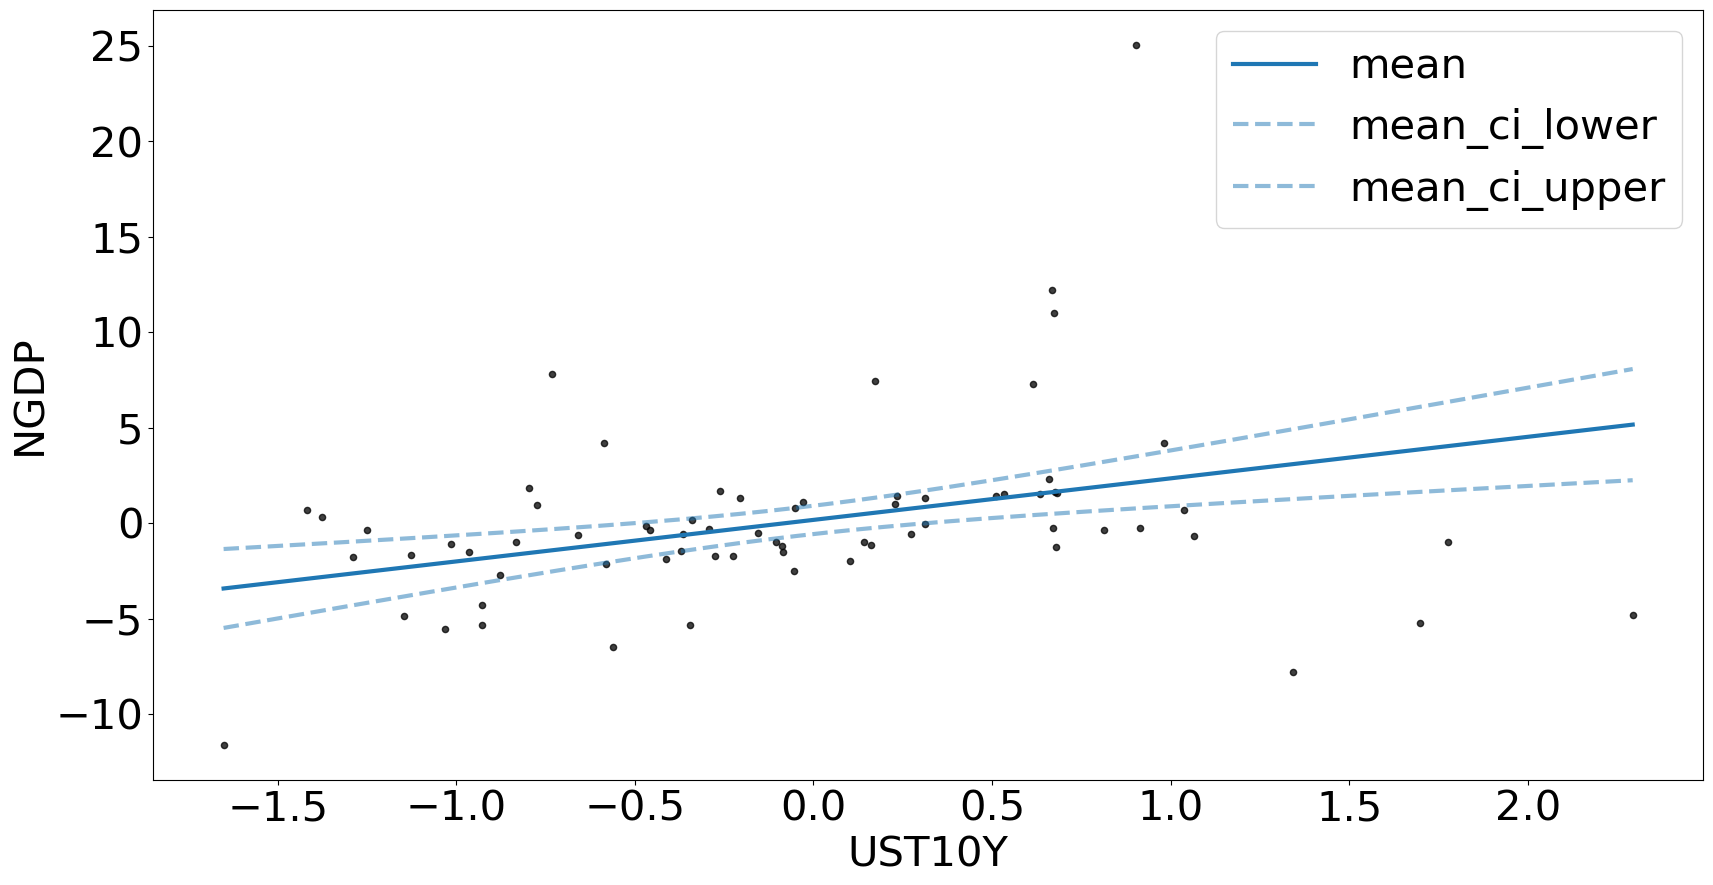

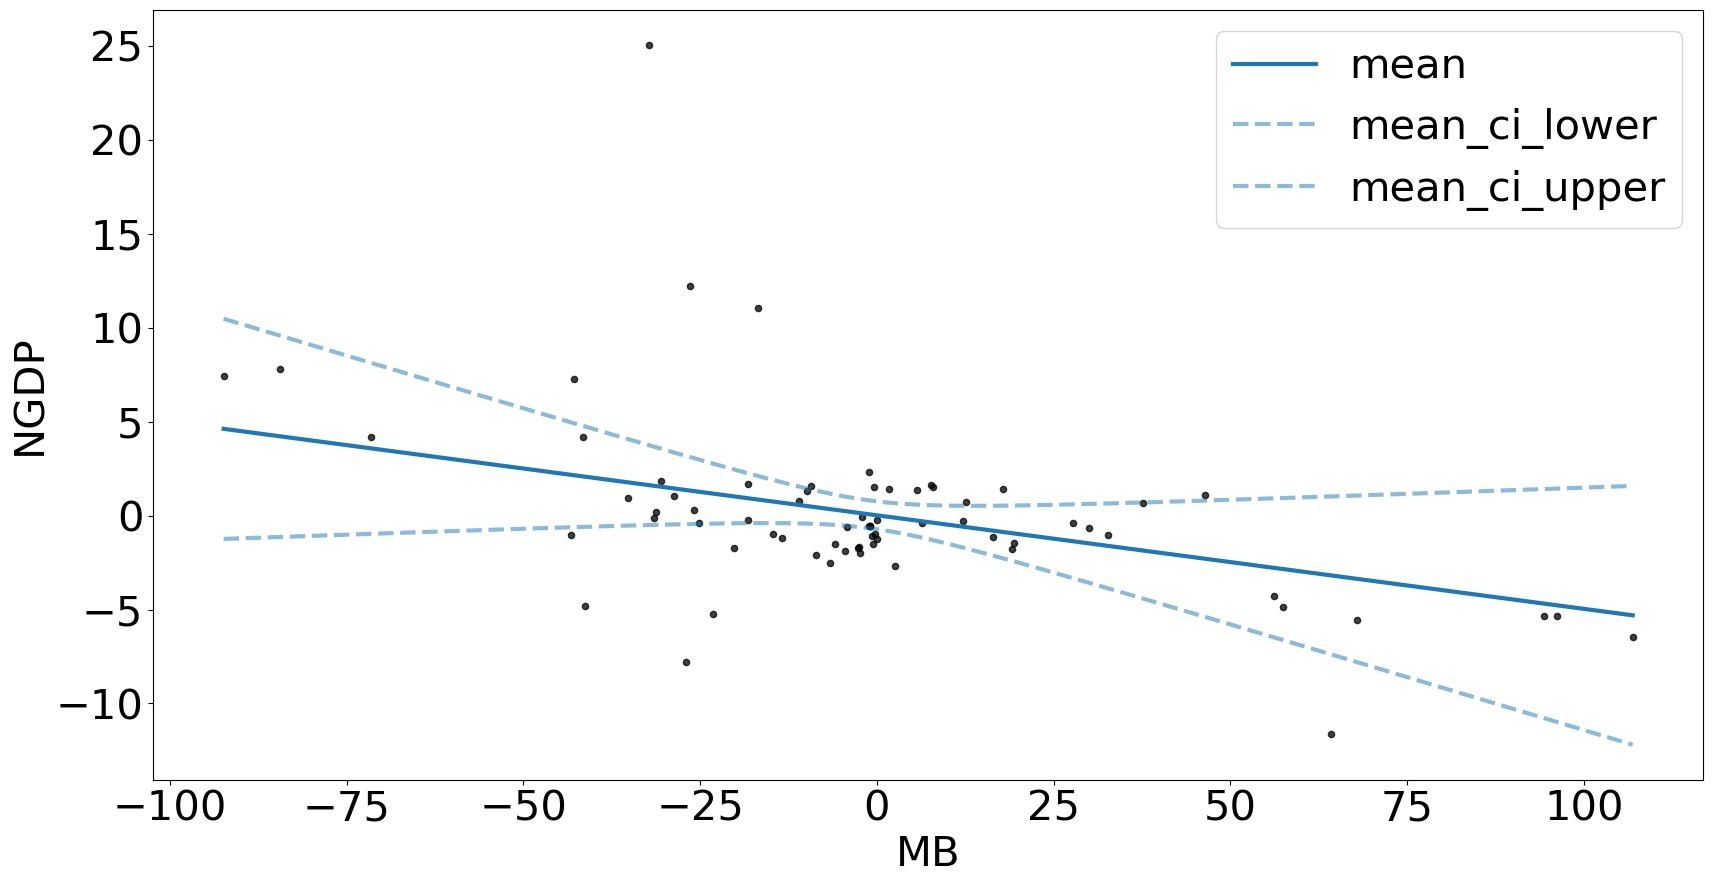

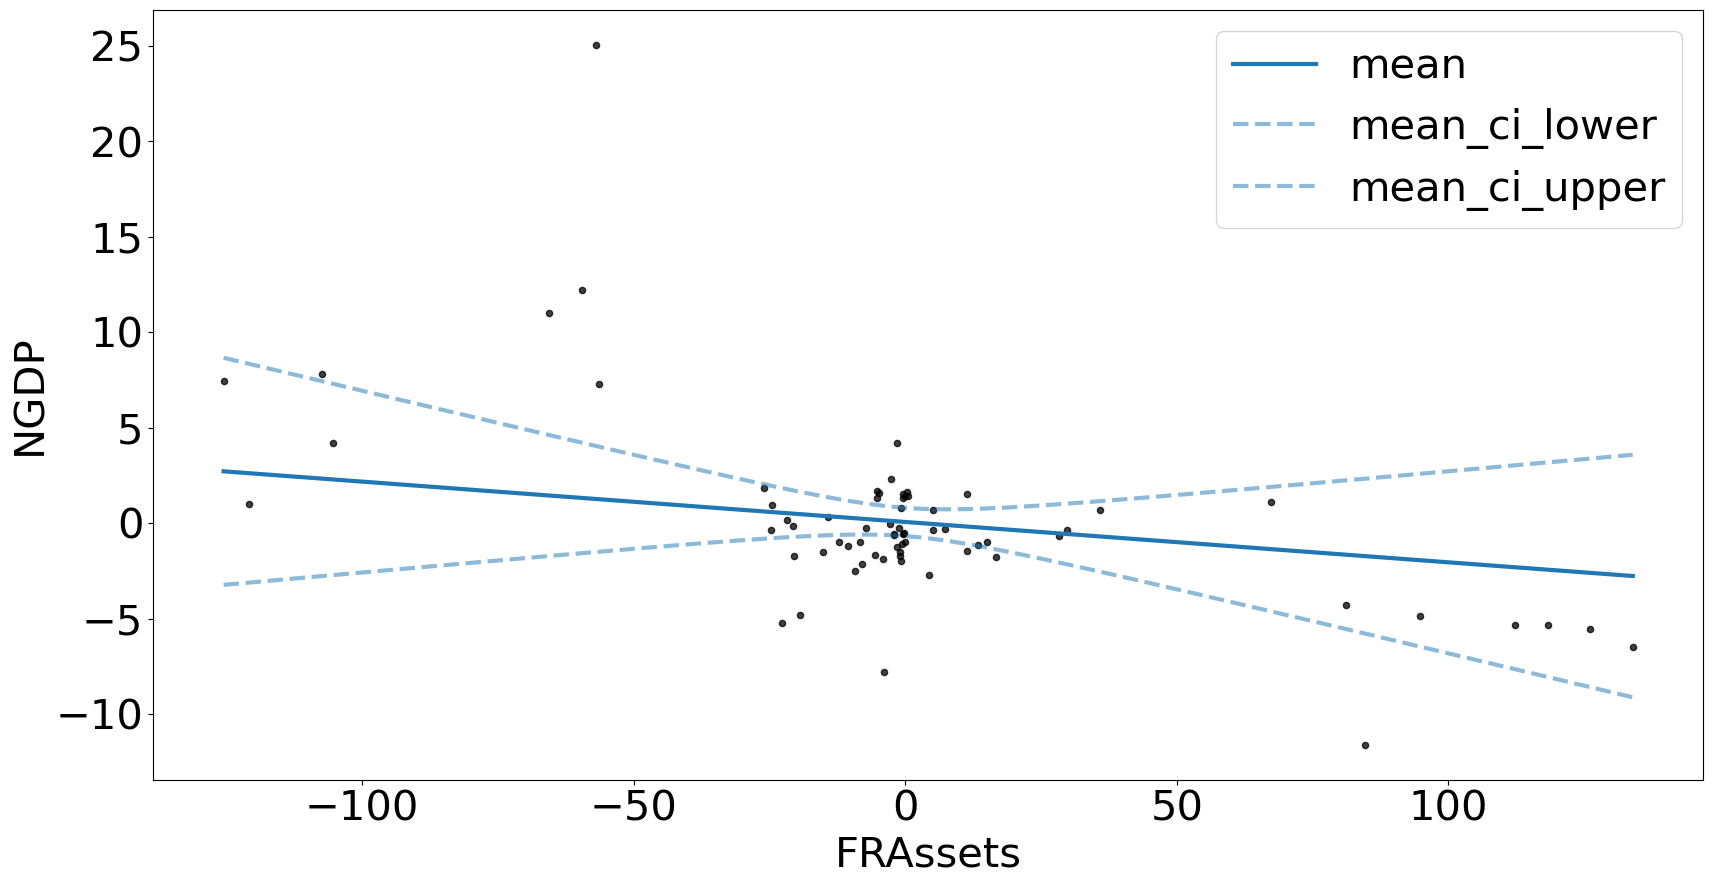

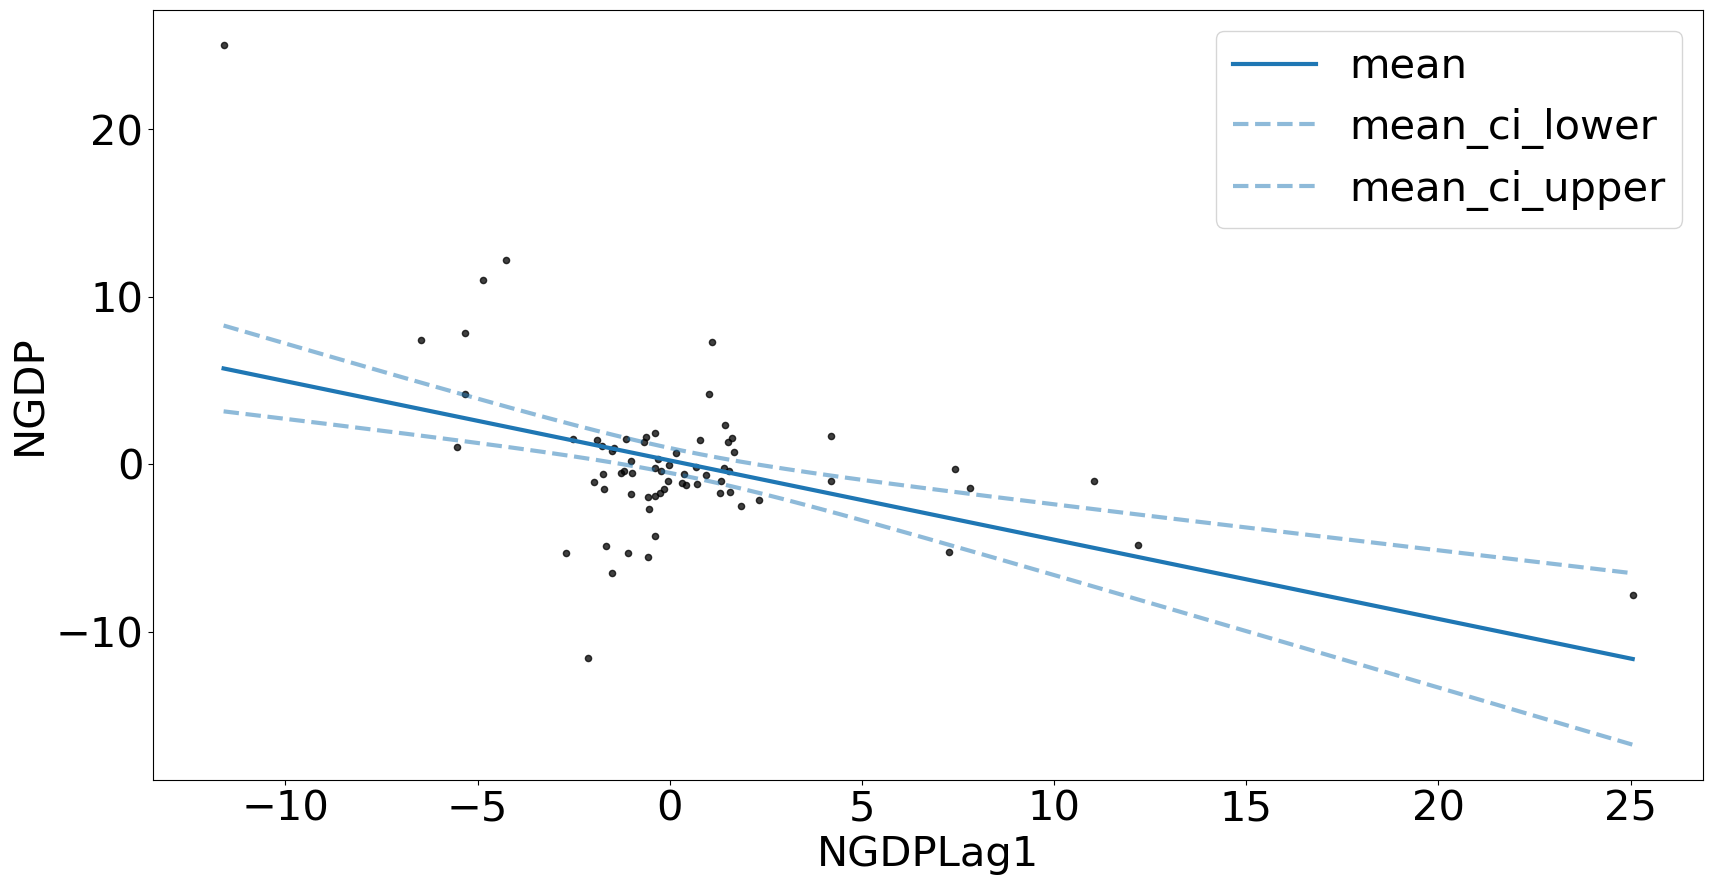

In [10]:
# fig, ax = plt.subplots(figsize = (20,20))
plot_vars = ["NGDP",  "EFFR", "UST10Y", "Currency", "MB","FRAssets"]
# annual_rate["FRAssets"].fillna(0, inplace = True)
plot_df = annual_rate.diff(freq)[plot_vars].loc["2004":].dropna()
formula = 'NGDP ~  Currency + EFFR + UST10Y + MB + FRAssets'

for key in plot_df:
    for i in range(1, lags + 1):
        plot_df[key + "Lag" + str(i)] = plot_df[key].shift(freq * i)
        formula = formula + " + NGDPLag" + str(i) 
        
# plot_df.plot.scatter(y = "NGDP", x = "EFFR", ax = ax)
# y = plot_df[[plot_vars[0]]]
# X = plot_df[plot_vars[1:]]
# X["Constant"] = 1
# reg = sm.OLS(y, X)
reg = smf.ols(
    formula=formula,
    data = plot_df)
results = reg.fit()
print(results.summary())
build_smooth_multiple_regression_estimator(reg, plot_df)
plot_df[plot_vars + ["NGDPLag" + str(i) for i in range(1, lags + 1)]].pcorr()


C:\Users\JLCat\AppData\Local\Temp\ipykernel_12104\3705548697.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y)) + "%" for y in ax.get_yticks()], color = "C0", fontsize = 40)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_12104\3705548697.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(int(y)) + "%" for y in ax2.get_yticks()], color = "C0", alpha = alpha2, fontsize = 40)


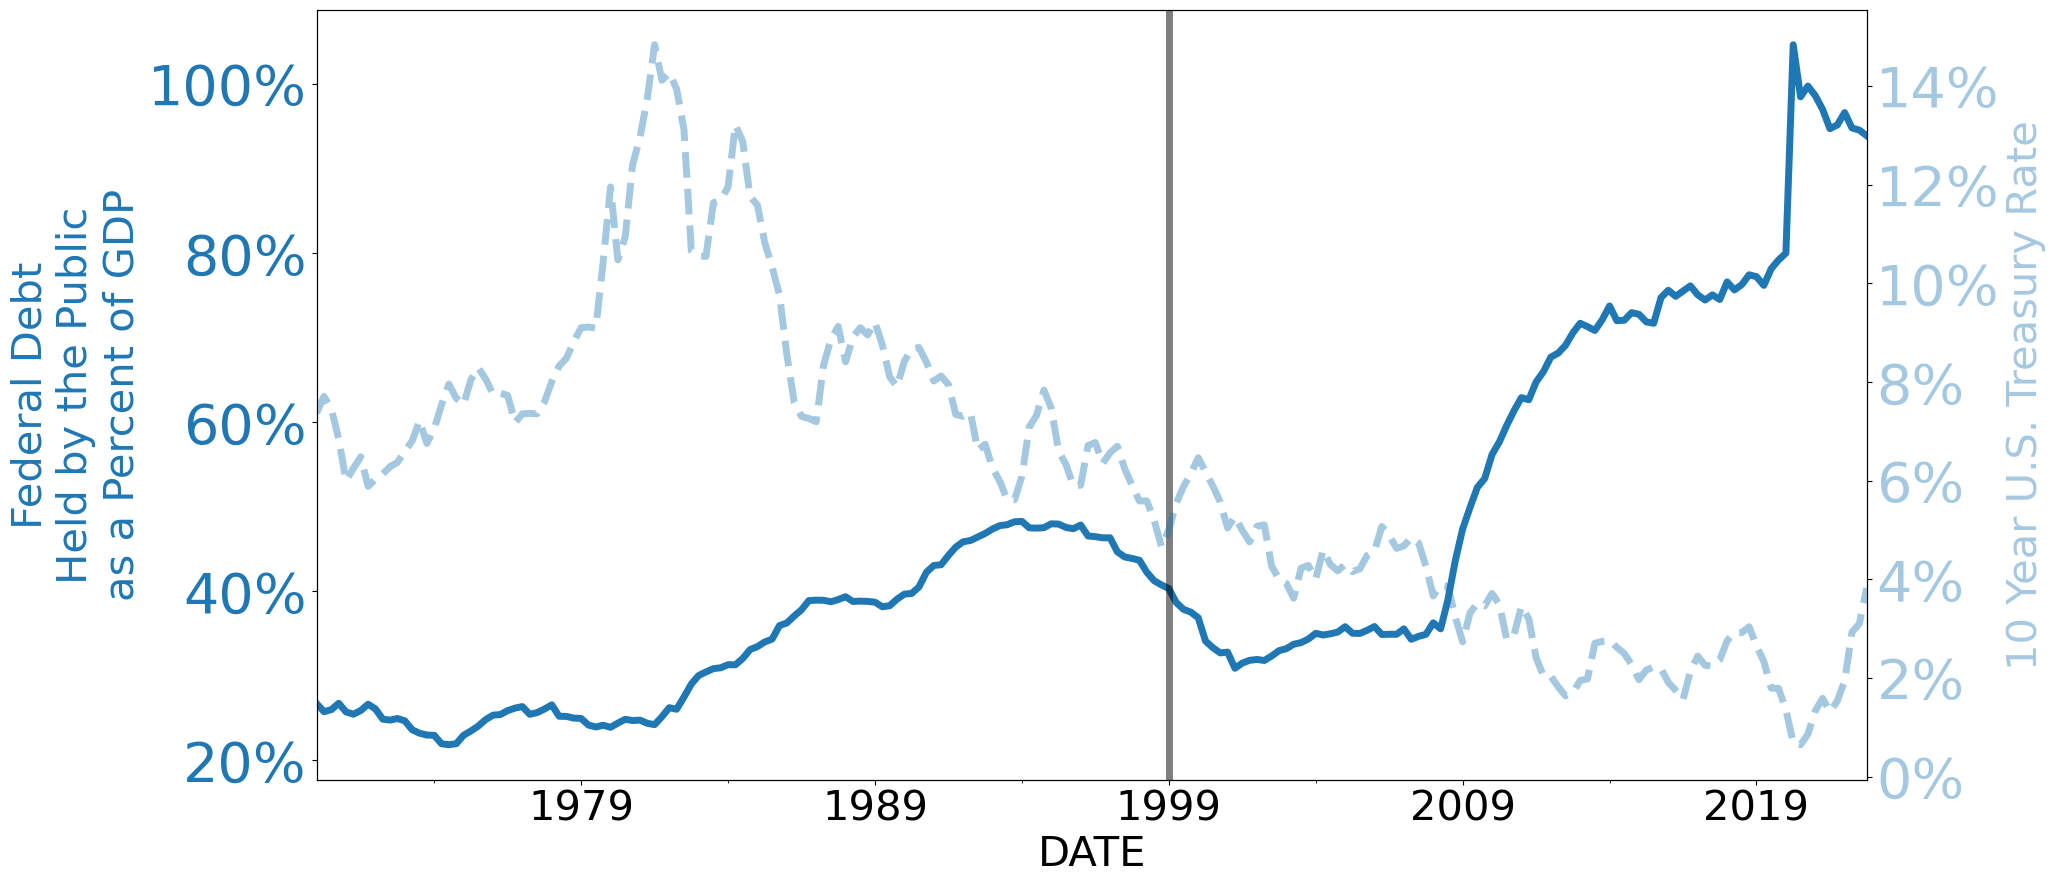

In [53]:
fig, ax = plt.subplots(figsize = (20,10))
ax2 = ax.twinx()
alpha2 = .4
data["$\\frac{Debt}{GDP}$"].dropna().plot.line(linewidth = 5, 
                                            ax = ax)
data.dropna(subset = "$\\frac{Debt}{GDP}$")["UST10Y"].plot.line(linewidth = 5,
                                                                color = "C0",
                                                                ls = "--",
                                                                alpha = alpha2,
                                                                ax = ax2)
ax.set_yticklabels([str(int(y)) + "%" for y in ax.get_yticks()], color = "C0", fontsize = 40)
ax2.set_yticklabels([str(int(y)) + "%" for y in ax2.get_yticks()], color = "C0", alpha = alpha2, fontsize = 40)
ax.set_ylabel("Federal Debt\nHeld by the Public\nas a Percent of GDP", color = "C0")
ax2.set_ylabel("10 Year U.S. Treasury Rate", alpha = alpha2, color = "C0")
# ax.axhline(data["$\\frac{Debt}{GDP}$"].dropna().iloc[-1], ls = "--", color = "k", linewidth = 5, alpha = .3)
ax.axvline("1999", ls = "-", color = "k", linewidth = 5, alpha = .5)

In [59]:
data["$\\frac{Debt}{GDP}$"].loc["1990":].min(), data["$\\frac{Debt}{GDP}$"].loc["1990":].max(), data["$\\frac{Debt}{GDP}$"].iloc[-2]

(30.89137, 104.64254, 93.88342)

In [60]:
data

,$CPI$,MB,UST10Y,NGDP,Currency,FRAssets,EFFR,$\frac{Debt}{GDP}$
DATE,,,,,,,,
1950-03-31,23.533333,NaN,NaN,280.828,27.090333,NaN,NaN,NaN
1950-06-30,23.700000,NaN,NaN,290.383,27.036667,NaN,NaN,NaN
1950-09-30,24.266667,NaN,NaN,308.153,27.093333,NaN,NaN,NaN
1950-12-31,24.766667,NaN,NaN,319.945,27.473000,NaN,NaN,NaN
1951-03-31,25.633333,NaN,NaN,336.000,27.206667,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-03-31,284.122667,6.092733e+06,1.951129,24740.480,2241.041667,8.887833e+06,0.121444,96.61607
2022-06-30,292.572000,5.661033e+06,2.932581,25248.476,2273.359667,8.934916e+06,0.766813,94.79178
2022-09-30,296.418333,5.510067e+06,3.101094,25723.941,2278.160667,8.855809e+06,2.182935,94.54308
